In [ ]:
import numpy as np
import seaborn as sns
import cv2, os, glob, datetime
import matplotlib.pyplot as plt
from keras import layers, Input
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.applications import InceptionV3
from keras.models import Sequential, Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation, Dropout, GlobalAveragePooling2D
from tqdm import tqdm
from keras.callbacks import Callback
import zipfile
import gdown

In [ ]:
# File ID from the shared Google Drive link
file_id = '1ptbUSFGf9Fy-l5jR08frVtYqChyGW0wF'
# URL to the file
url = f'https://drive.google.com/uc?id={file_id}'
# Output file name
output = 'data.zip'

# Download the file
gdown.download(url, output, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1ptbUSFGf9Fy-l5jR08frVtYqChyGW0wF
From (redirected): https://drive.google.com/uc?id=1ptbUSFGf9Fy-l5jR08frVtYqChyGW0wF&confirm=t&uuid=252324d2-d22f-401c-84d8-84f3f53161a5
To: /content/data.zip
100%|██████████| 437M/437M [00:01<00:00, 261MB/s]


'data.zip'

In [ ]:
# Define the path to the zip file
zip_file_path = os.path.join("data.zip")

# Define the extraction directory
extraction_directory = os.path.join("data")

# Create the extraction directory if it doesn't exist
os.makedirs(extraction_directory, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_directory)

# Define the relative path to the "Orignal DFAN" folder
relative_path = os.path.join('data','Oringal DFAN')

# Use glob to read the folders inside the "Orignal DFAN" folder
folders = glob.glob(os.path.join(relative_path, '*'))
print(folders)

['data/Oringal DFAN/SUV_Fire', 'data/Oringal DFAN/Bus_Fire', 'data/Oringal DFAN/Electric_Fire', 'data/Oringal DFAN/Building_Fire', 'data/Oringal DFAN/Car_Fire', 'data/Oringal DFAN/PickUp_Fire', 'data/Oringal DFAN/Non_Fire', 'data/Oringal DFAN/Boat_Fire', 'data/Oringal DFAN/Van_Fire', 'data/Oringal DFAN/Forest_Fire', 'data/Oringal DFAN/Cargo_Fire', 'data/Oringal DFAN/Train_Fire']


In [ ]:
img_list = []
label_list = []

for folder in folders:
    print(folder)
    for img in glob.glob(os.path.join(folder, "*.jpg")):
        n = cv2.imread(img)
        class_num = folders.index(folder)
        label_list.append(class_num)
        resized = cv2.resize(n, (299,299), interpolation=cv2.INTER_AREA)
        img_list.append(resized)

X_train, X_valid, y_train, y_valid = train_test_split(img_list, label_list, test_size=0.2, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.1, random_state=1)
X_train = np.array(X_train)
y_train = np.array(y_train)
X_valid = np.array(X_valid)
y_valid = np.array(y_valid)
X_test = np.array(X_test)
y_test = np.array(y_test)

print("training_set", X_train.shape)
print("training_set", y_train.shape)
print("validation_set", X_valid.shape)
print("validation_set", y_valid.shape)
print("test_set", X_test.shape)
print("test_set", y_test.shape)
print("Train_Folder", len(X_train))
print("validation_Folder", len(X_valid))
print("Test_Folder", len(X_test))


data/Oringal DFAN/SUV_Fire
data/Oringal DFAN/Bus_Fire
data/Oringal DFAN/Electric_Fire
data/Oringal DFAN/Building_Fire
data/Oringal DFAN/Car_Fire
data/Oringal DFAN/PickUp_Fire
data/Oringal DFAN/Non_Fire
data/Oringal DFAN/Boat_Fire
data/Oringal DFAN/Van_Fire
data/Oringal DFAN/Forest_Fire
data/Oringal DFAN/Cargo_Fire
data/Oringal DFAN/Train_Fire
training_set (2737, 299, 299, 3)
training_set (2737,)
validation_set (761, 299, 299, 3)
validation_set (761,)
test_set (305, 299, 299, 3)
test_set (305,)
Train_Folder 2737
validation_Folder 761
Test_Folder 305


In [ ]:
print(len(np.unique(y_valid)))
print(len(np.unique(y_test)))
print(len(np.unique(y_train)))

12
12
12


In [ ]:
inp = 299
model = InceptionV3(weights="imagenet", include_top=False, input_shape=(____, ____, 3))

# Define the input layer with shape (inp, inp, 3)
inputs = Input((____, ____, 3))

# Pass the input through the base model (e.g., a pretrained model)
X = model(____)

# Apply Global Average Pooling to the output of the base model
flat1 = GlobalAveragePooling2D()(____)
x3 = layers.____()(X)

# Create a dense layer pipeline starting from the flattened layer
x1 = layers.Dense(____, activation='____')(____)
x1 = layers.Dense(____, activation='____')(x1)
x1 = layers.____()(x1) # Batch norm

# Create a convolutional layer pipeline starting from the base model output, Use same padding, use same number of filters
x2 = layers.Conv2D(filters=____, kernel_size=(1, 1), activation='____', padding='____')(X)
x2 = layers.Conv2D(filters=____, kernel_size=(3, 3), activation='____', padding='____')(x2)
x2 = layers.Conv2D(filters=____, kernel_size=(1, 1), activation='____', padding='____')(x2)

# Apply Global Average Pooling to the convolutional layer output
x2 = layers.____()(x2)
x2 = layers.____()(x2) # norm

# Concatenate the dense layer pipeline output and the convolutional layer pipeline output
BAM = layers.____([____, ____])
BAM = layers.____()(BAM)

# Concatenate the pooled base model output and the BAM output
BAM = layers.____([____, ____])

# Add a dense layer with 150 units
F = layers.____(____, activation='____')(BAM)
F = layers.____()(F)

# Add the final output layer with softmax activation for classification (12 classes)
output = Dense(____, activation='____')(F)

# Define the final model
model = Model(inputs=____, outputs=____)

# Print the model summary
model.____()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_9 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 inception_v3 (Functional)   (None, 8, 8, 2048)           2180278   ['input_9[0][0]']             
                                                          4                                       
                                                                                                  
 conv2d_570 (Conv2D)         (None, 8, 8, 64)             131136    ['inception_v3[0][0]']        
                                                                                                  
 global_average_pooling2d_6  (None, 2048)                 0         ['inception_v3[0][0]']  

In [ ]:
class TQDMProgressBar(Callback):
    def on_epoch_begin(self, epoch, logs=None):
        if epoch == 0:
            self.epochs = self.params['epochs']
            self.progress_bar = tqdm(total=self.epochs, desc='Training Progress')

    def on_epoch_end(self, epoch, logs=None):
        self.progress_bar.update(1)

    def on_train_end(self, logs=None):
        self.progress_bar.close()

In [ ]:
import tensorflow as tf

# List all available physical devices
physical_devices = tf.config.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))

# Check if TensorFlow is using the GPU
if len(physical_devices) > 0:
    print("TensorFlow is using the GPU.")
    for gpu in physical_devices:
        print(f" - Device: {gpu}")
else:
    print("TensorFlow is not using the GPU.")

Num GPUs Available:  1
TensorFlow is using the GPU.
 - Device: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [ ]:
# Define your model, optimizer, and other parameters
batch_size = ____
epochs = ____
opt = SGD(learning_rate=____, momentum=____)

model.compile(optimizer=____, loss='sparse_categorical_crossentropy', metrics=[____]) # classifcation, use correct metric

# Create an instance of the custom TQDM progress bar callback
tqdm_callback = TQDMProgressBar()

# Set the GPU device context
with tf.device('/GPU:0'):
    # Train the model with the custom callback
    history = model.fit(
        ____, ____,
        batch_size=____,
        epochs=____,
        verbose=0,  # Set verbose to 0 to use tqdm for progress display
        validation_data=(____, ____),
        callbacks=[tqdm_callback]
    )


Training Progress: 100%|██████████| 10/10 [06:36<00:00, 39.64s/it]
/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<Figure size 3000x3000 with 0 Axes>

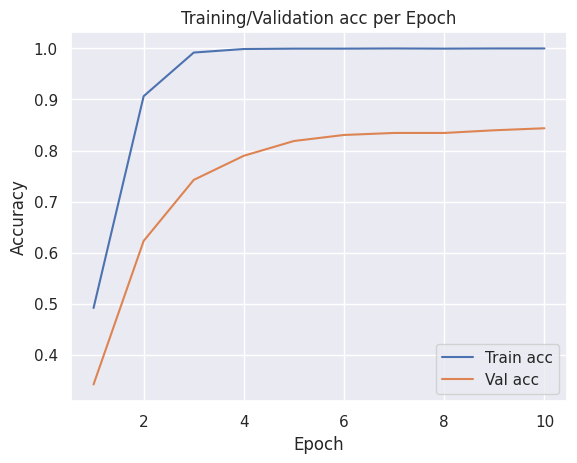

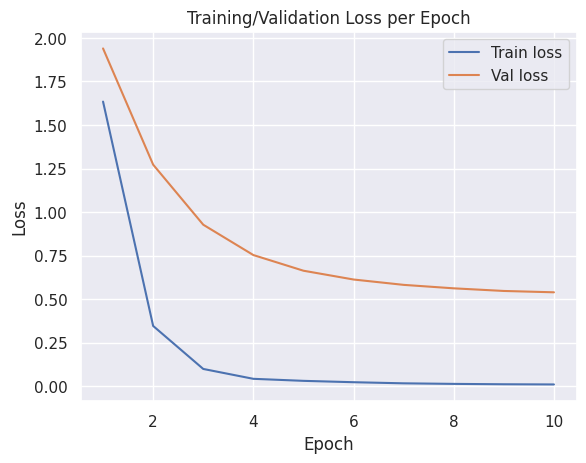

24/24 [==============================] - 3s 111ms/step
***** Validation Confusion Matrix *****
[[45  0  0  0  8  3  0  0  2  0  0  0]
 [ 1 66  0  1  3  0  0  1  4  0  2  2]
 [ 0  1 55  3  0  0  0  1  1  2  0  1]
 [ 0  1  3 66  0  0  0  0  0  0  0  0]
 [ 4  4  1  0 86  2  1  1  3  1  0  1]
 [ 2  2  0  0  5 34  0  1  0  0  1  0]
 [ 0  0  1  2  0  0 12  0  0  1  0  3]
 [ 0  0  1  0  0  0  0 63  0  0  1  0]
 [ 0  2  1  0  7  1  0  2 46  0  3  0]
 [ 0  2  1  0  1  0  0  3  0 82  0  0]
 [ 3  2  0  0  3  1  0  0  3  0 27  1]
 [ 0  1  0  1  0  1  0  1  0  1  0 60]]
***** Validation Classification Report *****
              precision    recall  f1-score   support

     Class_0       0.82      0.78      0.80        58
     Class_1       0.81      0.82      0.82        80
     Class_2       0.87      0.86      0.87        64
     Class_3       0.90      0.94      0.92        70
     Class_4       0.76      0.83      0.79       104
     Class_5       0.81      0.76      0.78        45
     Class_6

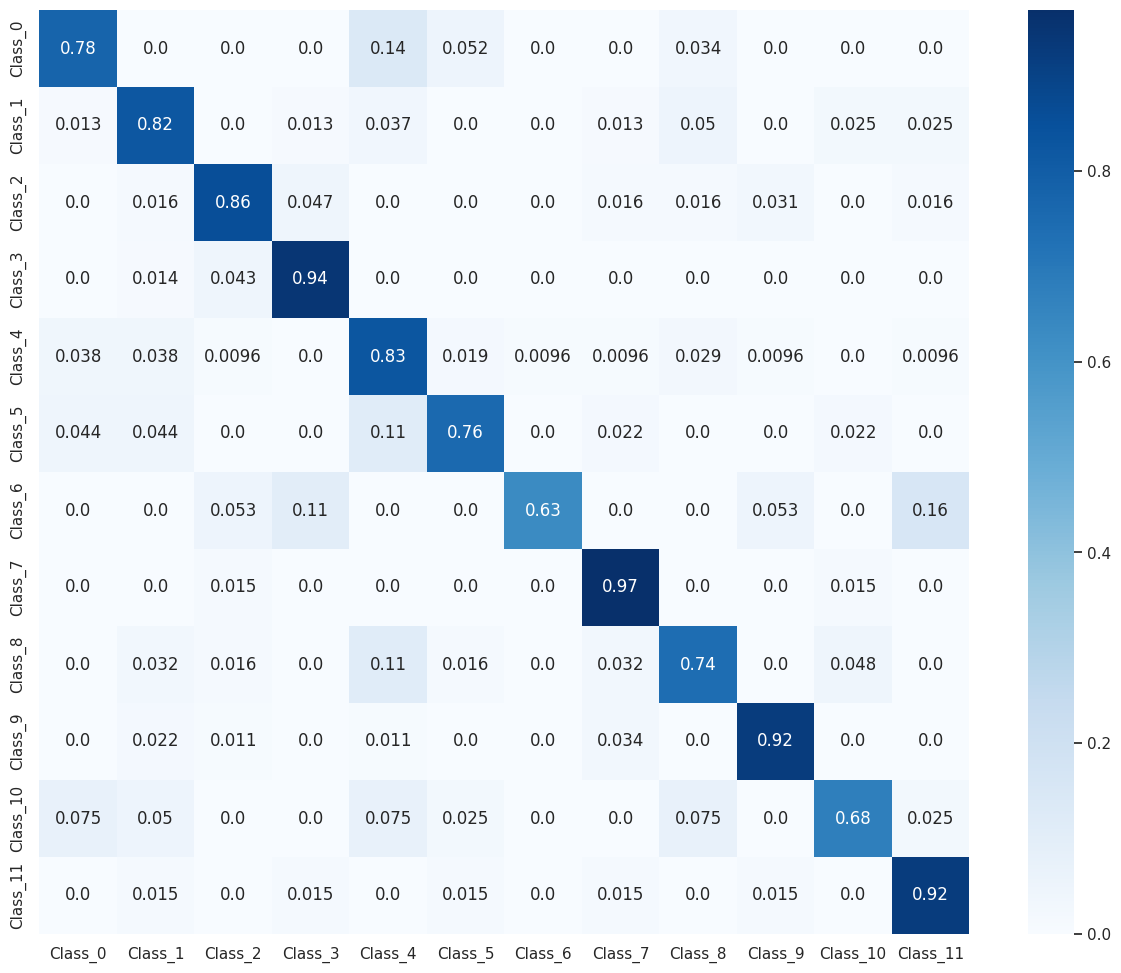

***** Test Confusion Matrix *****
[[12  0  0  0  1  0  0  0  0  0  1  0]
 [ 1 30  0  0  0  0  0  0  1  0  1  0]
 [ 0  0 15  0  0  0  0  0  0  1  0  1]
 [ 0  0  3 22  0  0  0  0  0  0  0  0]
 [ 2  0  0  0 45  0  0  0  0  1  2  0]
 [ 1  0  0  0  3 18  0  0  0  0  0  0]
 [ 0  0  1  0  0  1  5  0  0  0  0  0]
 [ 0  0  0  0  2  0  0 26  0  0  0  0]
 [ 1  1  0  0  2  1  0  0 18  1  2  0]
 [ 0  0  0  0  0  0  1  0  0 42  0  0]
 [ 0  0  0  0  2  0  0  0  1  0 11  0]
 [ 0  0  1  0  0  0  0  0  1  0  1 23]]
***** Test Classification Report *****
              precision    recall  f1-score   support

     Class_0       0.71      0.86      0.77        14
     Class_1       0.97      0.91      0.94        33
     Class_2       0.75      0.88      0.81        17
     Class_3       1.00      0.88      0.94        25
     Class_4       0.82      0.90      0.86        50
     Class_5       0.90      0.82      0.86        22
     Class_6       0.83      0.71      0.77         7
     Class_7       1.00  

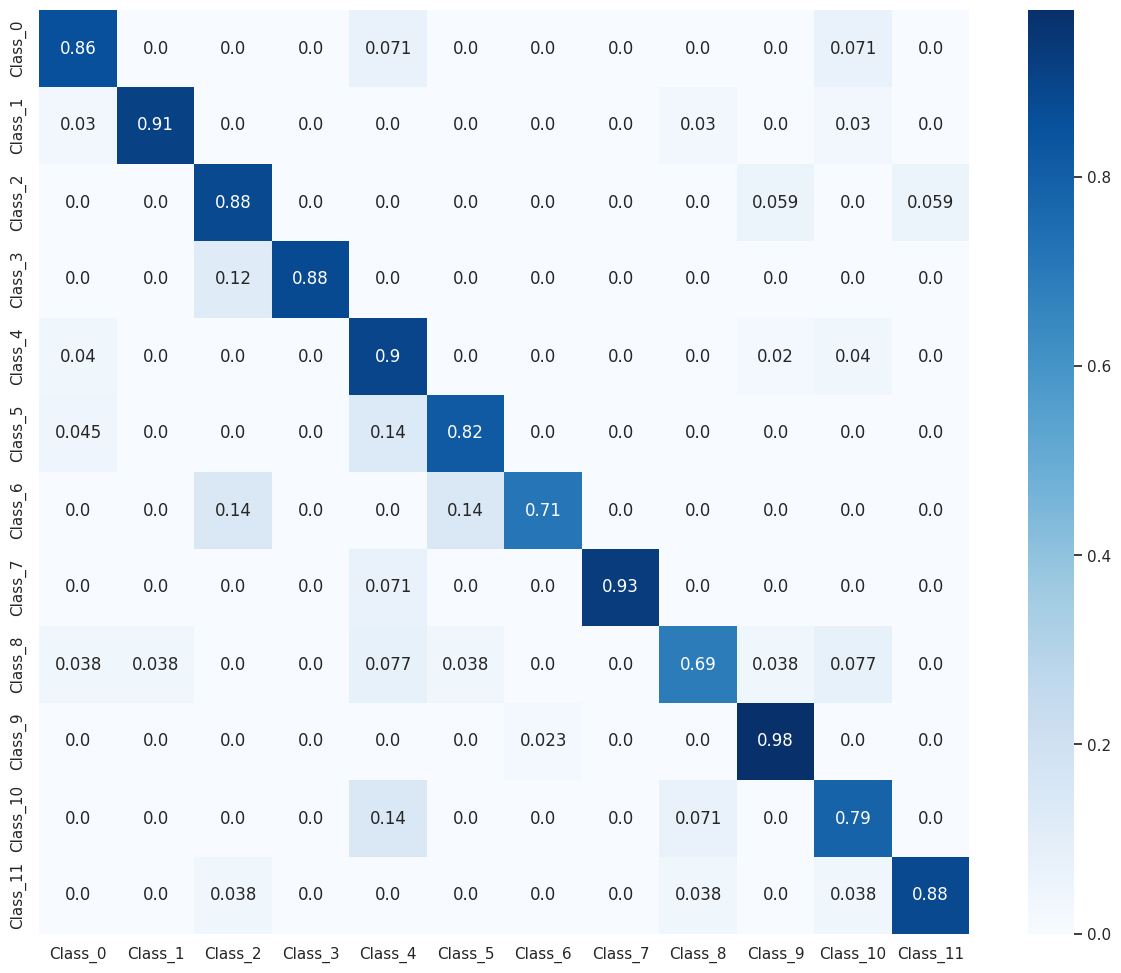

10/10 [==============================] - 1s 114ms/step - loss: 0.3954 - accuracy: 0.8754

Testing loss: 0.3954
Testing accuracy: 0.8754


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

plt.figure(figsize=(30, 30))
sns.set(font_scale=1.0)

f, ax = plt.subplots()
ax.plot([None] + history.history['accuracy'])
ax.plot([None] + history.history['val_accuracy'])
ax.legend(['Train acc', 'Val acc'], loc=0)
ax.set_title('Training/Validation acc per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')

f, ax = plt.subplots()
ax.plot([None] + history.history['loss'])
ax.plot([None] + history.history['val_loss'])
ax.legend(['Train loss', "Val loss"], loc=1)
ax.set_title('Training/Validation Loss per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
plt.show()

y_test_pred = model.predict(X_test)
y_test_pred = np.argmax(y_test_pred, axis=1)

y_val_pred = model.predict(X_valid)
y_val_pred = np.argmax(y_val_pred, axis=1)

# Function to generate confusion matrix and classification report dynamically
def generate_reports(y_true, y_pred, dataset_type):
    # Get unique classes from the true and predicted labels
    unique_classes = np.unique(np.concatenate((y_true, y_pred)))

    # Create target names for the classification report based on unique classes
    target_names = [f"Class_{i}" for i in unique_classes]

    # Generate the confusion matrix using the true and predicted labels
    cm = confusion_matrix(y_true, y_pred, labels=unique_classes)

    # Print the confusion matrix with the dataset type
    print(f"***** {dataset_type} Confusion Matrix *****")
    print(cm)

    # Print the classification report with the dataset type
    print(f"***** {dataset_type} Classification Report *****")
    print(classification_report(y_true, y_pred, labels=unique_classes, target_names=target_names))

    # Number of unique classes
    classes = len(unique_classes)

    # Initialize a normalized confusion matrix
    con = np.zeros((classes, classes))

    # Normalize the confusion matrix
    for x in range(classes):
        for y in range(classes):
            con[x, y] = cm[x, y] / np.sum(cm[x, :])

    # Plot the normalized confusion matrix as a heatmap
    plt.figure(figsize=(15, 12))
    df = sns.heatmap(con, annot=True, fmt='.2', cmap='Blues', xticklabels=target_names, yticklabels=target_names)

    # Save the heatmap as a PNG file
    df.figure.savefig(f"{dataset_type}_Confusion_Matrix.png")

    # Display the heatmap
    plt.show()

# Generate reports for validation set
generate_reports(y_valid, y_val_pred, "Validation")

# Generate reports for test set
generate_reports(y_test, y_test_pred, "Test")

print('\nTesting loss: {:.4f}\nTesting accuracy: {:.4f}'.format(*model.evaluate(X_test, y_test)))
